In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$dP_t =\sigma P_t(1-P_t) dW_t$$

In [2]:
T, N, n_sim = 4, 2000, 7    # time horizon and steps
dt = T/N                    # time step
sigma = 2.0                 # information flow parameter
p0 = 0.6                    # prior
t = np.linspace(0, T, N+1)

# Simulate SDE
P = np.zeros((n_sim, N+1))
P[:, 0] = np.full(n_sim, p0)
for i in range(N):
    dW = np.sqrt(dt) * np.random.randn(n_sim)
    P[:, i+1] = P[:, i] + sigma * P[:, i] * (1 - P[:, i]) * dW
    P[:, i+1] = np.clip(P[:, i+1], 0, 1)  # keep in [0,1]

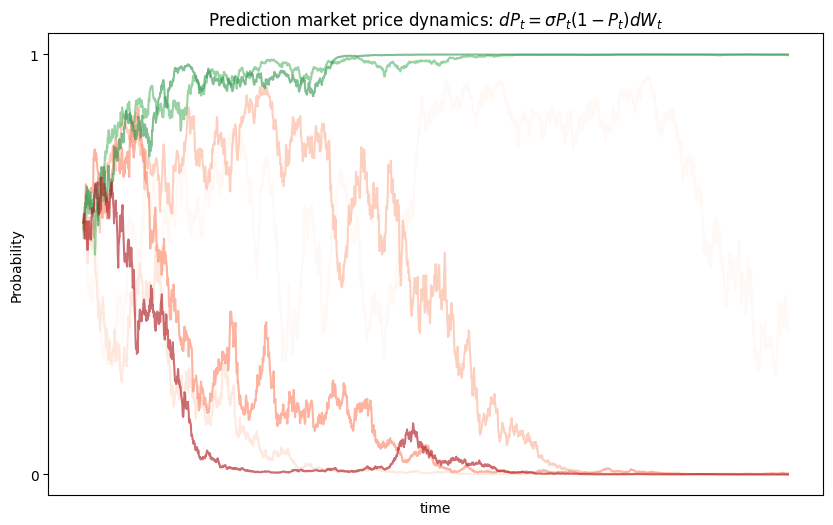

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_sim):
    ax.plot(t, P[i], alpha=0.6, c=plt.cm.Greens(i / n_sim) if P[i, -1] > 0.5 else plt.cm.Reds(i / n_sim))
ax.set_xlabel("time")
ax.set_ylabel("Probability")
ax.set_title("Prediction market price dynamics: $dP_t = \sigma P_t(1-P_t)dW_t$")
ax.set_yticks([0, 1])
ax.set_yticklabels(['0', '1'])
ax.set_xticks([])
plt.savefig("prediction_market_simulations.png", dpi=300, bbox_inches='tight')
plt.show()

$$dP_t = \frac{\kappa}{\sqrt{T-t}} P_t(1-P_t) dW_t$$

In [39]:
T, N, n_sim = 4, 2000, 7    # time horizon and steps
dt = T/N                    # time step
kappa = 2.0                 # information flow parameter
p0 = 0.6                    # prior
t = np.linspace(0, T, N+1)

# Simulate SDE
P = np.zeros((n_sim, N+1))
P[:, 0] = np.full(n_sim, p0)
for i in range(N):
    dW = np.sqrt(dt) * np.random.randn(n_sim)
    P[:, i+1] = P[:, i] + kappa/((T-t[i])+1e-8) * P[:, i] * (1 - P[:, i]) * dW
    P[:, i+1] = np.clip(P[:, i+1], 0, 1)  # keep in [0,1]

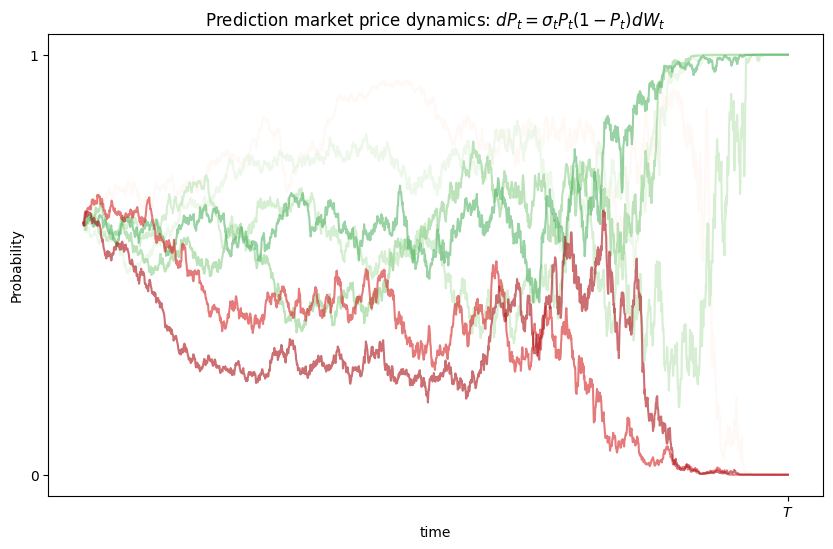

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_sim):
    ax.plot(t, P[i], alpha=0.6, c=plt.cm.Greens(i / n_sim) if P[i, -1] > 0.5 else plt.cm.Reds(i / n_sim))
ax.set_xlabel("time")
ax.set_ylabel("Probability")
ax.set_title("Prediction market price dynamics: $dP_t = \\sigma_t P_t(1-P_t)dW_t$")
ax.set_yticks([0, 1])
ax.set_yticklabels(['0', '1'])
ax.set_xticks([T])
ax.set_xticklabels(['$T$'])
plt.savefig("prediction_market_simulations_v2.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
P[:,-1]

array([0.92680039, 0.        , 0.99913692, 0.12959954, 1.        ,
       0.        , 0.98544924])